# Shakhyry Walsh  
### Professor Larry Cohen


## 1. Setup

In [1]:
# Import required libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Display plots inline
%matplotlib inline


## 2. API Key and Endpoint

In [7]:
API_KEY = 'W6EDf4VarFGE5edGDRUGyyjlvG89pd3J'

url = f'https://api.nytimes.com/svc/books/v3/lists/overview.json?api-key={API_KEY}'


## 3. Fetch Data

In [3]:
response = requests.get(url)
data = response.json()

data.keys()


dict_keys(['status', 'copyright', 'num_results', 'results'])

## 4. Transform to DataFrame

In [4]:
# Extract book data from all lists
books = []
for list_entry in data['results']['lists']:
    list_name = list_entry['list_name']
    for book in list_entry['books']:
        books.append({
            'List Name': list_name,
            'Title': book['title'],
            'Author': book['author'],
            'Publisher': book['publisher'],
            'Description': book['description'],
            'Rank': book['rank'],
            'Weeks on List': book['weeks_on_list'],
            'ISBN-10': book['primary_isbn10'],
            'ISBN-13': book['primary_isbn13']
        })

df = pd.DataFrame(books)
df.head()


,List Name,Title,Author,Publisher,Description,Rank,Weeks on List,ISBN-10,ISBN-13
0,Combined Print & E-Book Fiction,THE BLACK WOLF,Louise Penny,Minotaur,The 20th book in the Chief Inspector Gamache s...,1,1,,9781250328182
1,Combined Print & E-Book Fiction,THE WIDOW,John Grisham,Doubleday,"When Simon Latch, a lawyer in rural Virginia, ...",2,2,,9780385548984
2,Combined Print & E-Book Fiction,BONDS OF HERCULES,Jasmine Mas,Canary Street,The second book in the Villains of Lore series...,3,1,,9781335146984
3,Combined Print & E-Book Fiction,THE SECRET OF SECRETS,Dan Brown,Doubleday,As he searches for the missing noetic scientis...,4,8,,9780385546898
4,Combined Print & E-Book Fiction,THE PROVING GROUND,Michael Connelly,"Little, Brown",The eighth book in the Lincoln Lawyer series. ...,5,2,,9780316563826


## 5. Save to CSV

In [5]:
df.to_csv('nyt_books.csv', index=False)
print("Saved to nyt_books.csv")


Saved to nyt_books.csv


## 6. Visualize Top Books

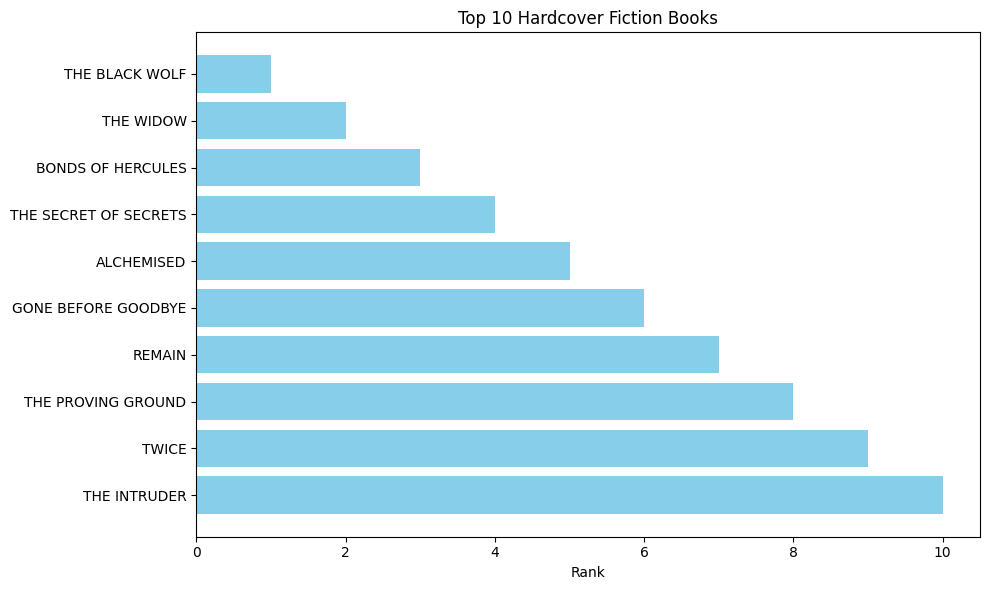

In [6]:
# Filter for Hardcover Fiction list
fiction_df = df[df['List Name'] == 'Hardcover Fiction'].sort_values('Rank')

# Plot top 10 books
top_books = fiction_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_books['Title'], top_books['Rank'], color='skyblue')
plt.xlabel('Rank')
plt.title('Top 10 Hardcover Fiction Books')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
